In [38]:
# Stdlib
import itertools
import multiprocessing

# Data
import pandas as pd
import numpy as np

# Viz
from matplotlib import pyplot as plt

# Problem


Say we have a set of n elements of slightly various weight:

In [39]:
n_cylinders = 5

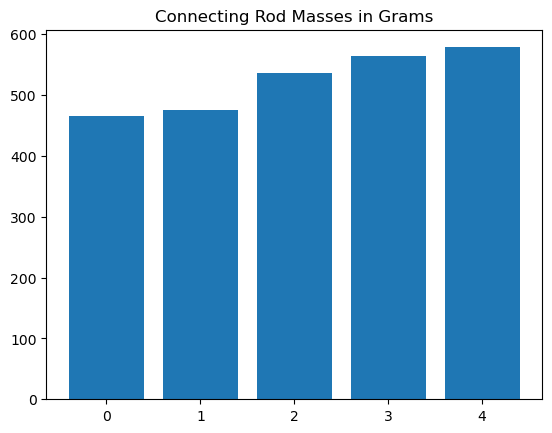

In [40]:
mass_rods = sorted(np.random.uniform(400, 600, n_cylinders).round(1))
plt.bar(np.arange(len(mass_rods)), mass_rods)
plt.title('Connecting Rod Masses in Grams')
plt.show()

We also have n piston ends of various masses:

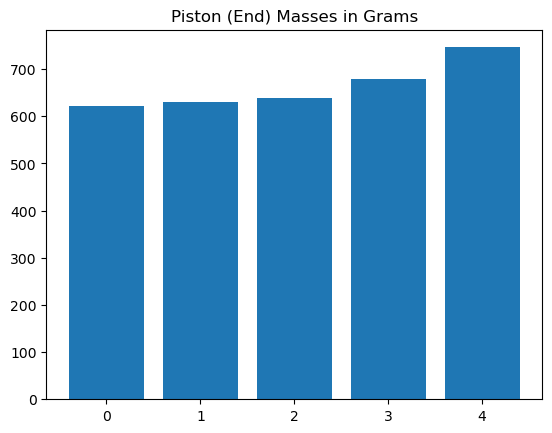

In [41]:
mass_pistons = sorted(np.random.uniform(500, 750, n_cylinders).round(1))
plt.bar(np.arange(len(mass_pistons)), mass_pistons)
plt.title('Piston (End) Masses in Grams')
plt.show()

We also have pins:

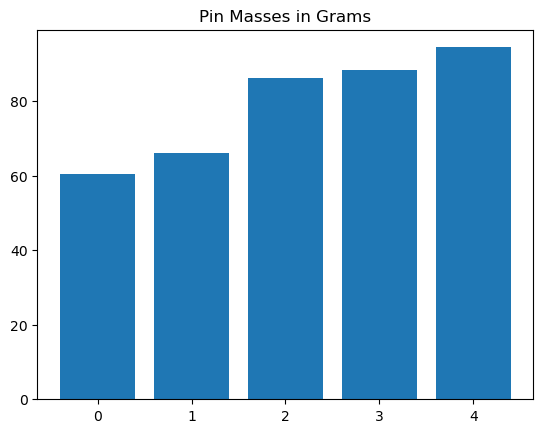

In [42]:
mass_pins = sorted(np.random.uniform(60, 100, n_cylinders).round(1))
plt.bar(np.arange(len(mass_pins)), mass_pins)
plt.title('Pin Masses in Grams')
plt.show()

So we have three arrays of varying masses:

In [43]:
mass_pins

[60.3, 66.0, 86.2, 88.4, 94.4]

In [44]:
mass_pistons

[622.7, 631.0, 639.4, 678.3, 746.2]

In [45]:
mass_rods

[464.7, 475.9, 535.9, 563.2, 578.2]

The question, given these parts, is:

__How can we assemble [n] sets of (pin, rod, piston) such that the variance between sets is minimized?__

# Brute Force Approach

Assemble every possible permutation of (pin, rod, piston), find the differences between the heaviest and lightest assemblies in each set, then select the arrangement with the lowest difference.

In [46]:
## Single-Threaded: ###
# Calculate all possible combinations of sets
rod_combinations = list(itertools.permutations(mass_pins))
piston_combinations = list(itertools.permutations(mass_pistons))
pin_combinations = list(itertools.permutations(mass_rods))

# Calculate the difference between min/max within a set
def weight_difference(sets):
    total_weights = [sum(s) for s in sets]
    return max(total_weights) - min(total_weights)

min_diff = float('inf')
optimal_arrangement = None

# Iterate through all possible combinations and find the one with the smallest weight difference
for rods in rod_combinations:
    for pistons in piston_combinations:
        for pins in pin_combinations:
            sets = list(zip(rods, pistons, pins))
            diff = weight_difference(sets)
            if diff < min_diff:
                min_diff = diff
                optimal_arrangement = sets

print("Optimal arrangement:", optimal_arrangement)
print(f"Smallest weight spread: {round(min_diff, 1)}g")

Optimal arrangement: [(60.3, 746.2, 464.7), (66.0, 631.0, 578.2), (86.2, 622.7, 563.2), (88.4, 639.4, 535.9), (94.4, 678.3, 475.9)]
Smallest weight spread: 26.6g


^ This works ok up to 5 cylinders but the combinatorial explosion gets weird beyond that.

Time to parallelize. It probably won't fit in memory. See the /src directory for optimized multithreading code.